In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the train data csv file as DataFrame

dataset = pd.read_csv("train.csv")
df = pd.DataFrame(dataset)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking the UNIQUE values and NUMBER OF UNIQUE values in some of the columns 

print(df['Dependents'].nunique())
print(df['Dependents'].unique())
print(df['Education'].nunique())
print(df['Property_Area'].nunique())
print(df['Self_Employed'].nunique())
print(df['Self_Employed'].unique())
print(df['Loan_ID'].nunique())

4
['0' '1' '2' '3+' nan]
2
3
2
['No' 'Yes' nan]
614


In [4]:
def preprocessing_data(dataframe):
    # Mapping the CATEGORICAL VARIABLES to numerical values

    dataframe['Gender'] = dataframe['Gender'].map({'Male' : 1, 'Female' : 0})
    dataframe['Married'] = dataframe["Married"].map({'Yes' : 1, 'No' : 0})
    dataframe['Dependents'].replace({'3+' : 3},inplace = True)
    dataframe['Education'] = dataframe['Education'].map({'Graduate' : 1, 'Not Graduate': 0})
    dataframe['Self_Employed'] = dataframe['Self_Employed'].map({'Yes' : 1, 'No' : 0})
    
    if len(dataframe.columns) == 13:
        dataframe['Loan_Status'] = dataframe['Loan_Status'].map({'Y' : 1, 'N' : 0})
    
    else:
        pass
    
    # Creating DUMMY VARIABLES for Property_Area
    property_location = pd.get_dummies(dataframe['Property_Area'])
    
    # Avoiding the DUMMY VARIABLE TRAP by dropping one column of the created "property_location" table
    property_location = pd.get_dummies(dataframe['Property_Area'], drop_first = True)
    
    # CONCATENATING the "property_location" table to the original DataFrame
    dataframe = pd.concat([dataframe,property_location], axis = 1)
    
    # Dropping the original column "Property_Area" from the DataFrame
    dataframe_ = dataframe.drop(['Property_Area'], axis = 1)
    
    # Removing the Gender column as it does not find relevance in loan approvement

    dataframe_.drop(['Gender'], axis = 1,inplace = True)
    return dataframe_
    

    
    

In [5]:
df_ = preprocessing_data(df)
df_.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,1
1,LP001003,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,1


In [6]:
# Showing Statistical Properties of the Data

df_.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
count,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000
mean,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.379479,0.328990
std,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.485653,0.470229
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Counting the number of NULL VALUES in each of the column

print(df_['Married'].isna().sum())
print(df_['Dependents'].isna().sum())
print(df_['Education'].isna().sum())
print(df_['Self_Employed'].isna().sum())
print(df_['ApplicantIncome'].isna().sum())
print(df_['CoapplicantIncome'].isna().sum())
print(df_['LoanAmount'].isna().sum())
print(df_['Loan_Amount_Term'].isna().sum())
print(df_['Credit_History'].isna().sum())
print(df_['Loan_Status'].isna().sum())

3
15
0
32
0
0
22
14
50
0


In [8]:
# Removing all the rows with null values

df_NA_removed = df_.dropna(axis = 0)
df_NA_removed.shape

(492, 13)

In [9]:
X = df_.iloc[:,[1,2,3,4,5,6,7,8,9,11,12]].values
y = df_.iloc[:,10:11]

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Fitting XGBoost to the Training set

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

In [13]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15 18]
 [ 6 84]]


In [14]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7820816326530612
0.05476524433134778


In [15]:
# Finding the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8048780487804879

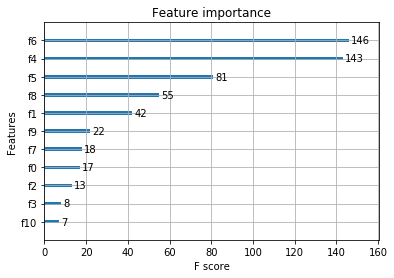

In [16]:
# ploting the feature importances usnig XGBoost built-in plot_importance

from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(classifier)
pyplot.show()


In [35]:
# Building a new set of features according to feature importance
# Taking only the TOP 5 features for model building

X = df_.iloc[:,[2,5,6,7,8,9]].values
y = df_.iloc[:,10:11]

In [36]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
# Fitting XGBoost to the Training set

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14 19]
 [ 6 84]]


In [40]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7800408163265307


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7967479674796748

In [42]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{"gamma": [0, 0.1, 0.2, 0.3, 0.4],
              "learning_rate": [0.05, 0.1, 0.15, 0.20], "max_depth": [3, 4, 5, 6, 7, 8],
              "min_child_weight" : [1, 3 , 5], "colsample_tree": [.3, .4, .5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

0.7942857142857143
{'colsample_tree': 0.3, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3}


C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arun\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Predict values based on new parameters
y_pred_grid = grid_search.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_grid)))

Accuracy Score : 0.7967479674796748


In [64]:
# Importing the test dataset

df_test = pd.read_csv('test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
# Calling the preprocessing method to preprocess the test data

df_test_ = preprocessing_data(df_test)
df_test_.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,LP001015,1,0,1,0.0,5720,0,110.0,360.0,1.0,0,1
1,LP001022,1,1,1,0.0,3076,1500,126.0,360.0,1.0,0,1
2,LP001031,1,2,1,0.0,5000,1800,208.0,360.0,1.0,0,1
3,LP001035,1,2,1,0.0,2340,2546,100.0,360.0,NaN,0,1
4,LP001051,0,0,0,0.0,3276,0,78.0,360.0,1.0,0,1


In [66]:
# Selecting the features for test dataset

df_test_ver2 = df_test_.iloc[:,[2,5,6,7,8,9]]
df_test_ver2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5720,0,110.0,360.0,1.0
1,1,3076,1500,126.0,360.0,1.0
2,2,5000,1800,208.0,360.0,1.0
3,2,2340,2546,100.0,360.0,NaN
4,0,3276,0,78.0,360.0,1.0


In [67]:
df_test_ver2.shape

(367, 6)

In [68]:
df_test_array = df_test_ver2.iloc[:,[0,1,2,3,4,5]].to_numpy()
df_test_array.shape

(367, 6)

In [69]:
# Predicting the values for test dataset

y_pred_grid_test = grid_search.predict(df_test_array)

In [70]:
final_1 = pd.DataFrame(y_pred_grid_test)
final_1 = final_1.rename(columns={0: 'Loan_Status'})
final_1['Loan_Status'] = final_1['Loan_Status'].map({1 : 'Y', 0 : 'N'})
final_1.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [72]:
final_2 = df_test_.iloc[:,0]
final_2 = pd.concat([final_2,final_1],axis = 1)
final_2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [73]:
# Generating the csv output

final_2.to_csv("sample_submission.csv",index=False)